In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
!pip install fbprophet
import fbprophet

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("GOOG.csv")
data.head()

Saving GOOG.csv to GOOG.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700
1,2019-08-12,1179.209961,1184.959961,1167.671997,1174.709961,1174.709961,1003000
2,2019-08-13,1171.459961,1204.780029,1171.459961,1197.270020,1197.270020,1294400
3,2019-08-14,1176.310059,1182.300049,1160.540039,1164.290039,1164.290039,1578700
4,2019-08-15,1163.500000,1175.839966,1162.109985,1167.260010,1167.260010,1218700


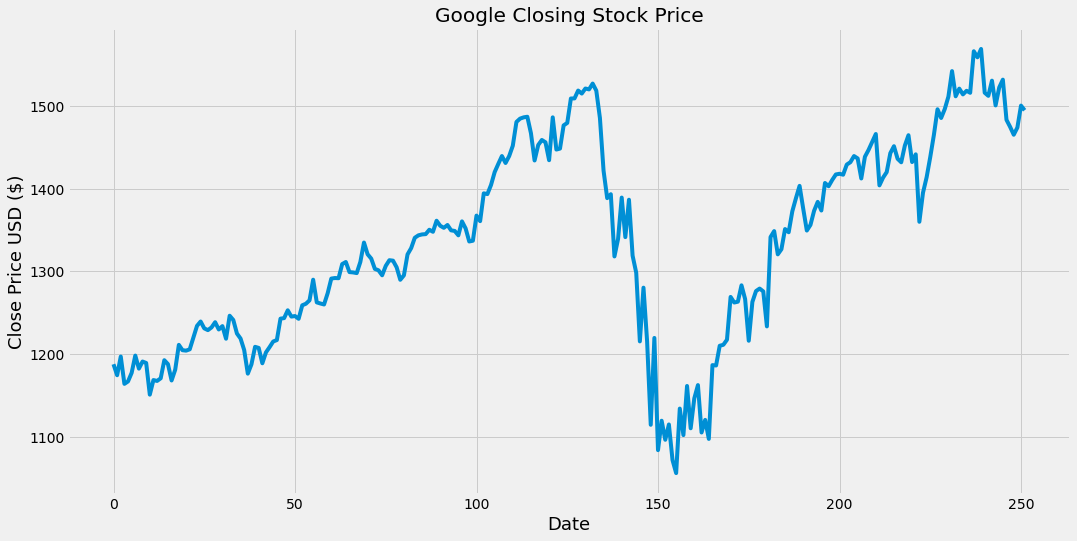

In [3]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [4]:
data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2019-08-09,1188.010010
1,2019-08-12,1174.709961
2,2019-08-13,1197.270020
3,2019-08-14,1164.290039
4,2019-08-15,1167.260010


In [5]:
from fbprophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


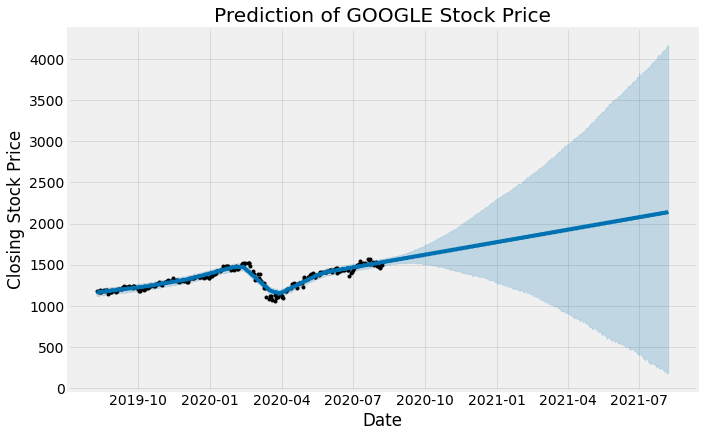

In [6]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

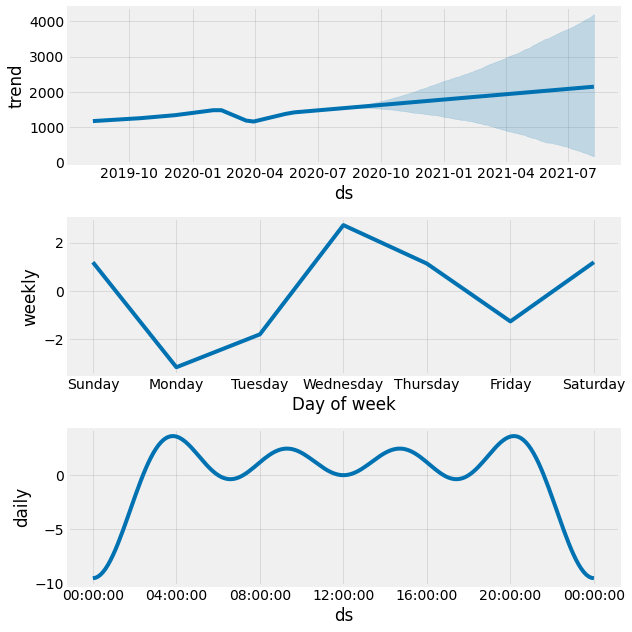

In [7]:
m.plot_components(predictions)
plt.show()

# **Candlestick Chart**

Candlestick Chart is a powerful way to visualize the trends and changes in the stock market and other financial instruments. Most people use a Candlestick chart to visualize the trading patterns. This article will take you through how you can create an interactive Candlestick chart using Python and Plotly.

To visualize our data in the form of Candlesticks, we must be having data that comprises open price, high price, low price, and close price. It is mainly used in financial analysis, so I will use the stock market data of Google of this year starting from January till 8 August.

# **Interactive Candlestick Chart with Python**
Japanese commodity Traders created this technique to build this type of chart, and initially, they were known as the Japanese Candlesticks. I will not go in that much detail because our end goal is to visualize this chart using Python.

I will scrape the stock market data of Google from yahoo finance using the pandas_datareader package. If you don’t want to scrape the data and want to use a CSV file, you can also download it from yahoo finance. Now let’s import the necessary packages we need for this task:

In [11]:
import plotly.graph_objects as go
import pandas_datareader as web

In [12]:
df = web.DataReader('GOOG', data_source='yahoo', start='2020-01-01', end='2020-08-08')
print(df.head())

                   High          Low  ...   Volume    Adj Close
Date                                  ...                      
2020-01-02  1368.140015  1341.550049  ...  1406600  1367.369995
2020-01-03  1372.500000  1345.543945  ...  1186400  1360.660034
2020-01-06  1396.500000  1350.000000  ...  1732300  1394.209961
2020-01-07  1402.989990  1390.380005  ...  1502700  1393.339966
2020-01-08  1411.579956  1390.839966  ...  1528000  1404.319946

[5 rows x 6 columns]


As the data is collected from yahoo finance, there is no possibility of missing figures and any need for data cleaning. So, as we are trying to build an interactive chart, I will use the Plotly package for this task, so I will now prepare the data so that it could be quickly baked into a Candlestick Chart:

In [13]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
open=df['Open'],
high=df['High'],
low=df['Low'],
close=df['Close'],
increasing_line_color='red',
decreasing_line_color = 'blue'
)])
fig.show()